In [25]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

from IPython.display import display
from IPython.display import clear_output

import importlib
import os
import copy

import dimensionality_reduction as dr

importlib.reload(dr);

**Before going to the implementation of t-SNE, let's dive into the math.**

t-SNE pays attention to the "distances" that all points have with each other, and pays less attation to the global structure.

<center>Probability that i will choose j as its neighbour.</center>
<img src="res/ij_choose.png" width=400 />

<center>The epsilon intuition. Ep. is defined for each data point separately.</center>
<img src="res/ep_anol.png" width=600 />

<center>Define preplexity as hiperparameter and use it to find all ep. with binary search.</center>
<img src="res/prep.png" width=600 />

<center>After which find Y points in lower dimention (linkely 2 or 3) that have Q t-distributions, which are similar to the P guassian distributions for every data point.</center>

<img src="res/Y_dist.png" width=400 />

<center>Minimizing KL divergance loss, that measure the loss between dists.</center>

<img src="res/KL_div.png" width=300 />
<img src="res/grad.png" width=500 />

In [26]:
X, y = datasets.make_blobs(n_samples=100, random_state=2022)

In [27]:
def display_func(y, w=8, h=6):
    
    width = w
    height = h
    labels = y
    
    def inner_func(X):
        fig, ax = plt.subplots(figsize=(width, height))
        scatter = ax.scatter(X[:, 0], X[:, 1], c=labels)
        legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
        ax.add_artist(legend1)
        display(fig)
        
    return inner_func

# create function for plotting
display_plot = display_func(y)

In [28]:
t_sne = dr.ImpTSNE(2) # 2 dim

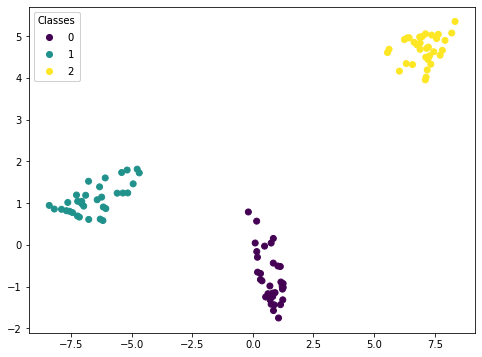

Finished.


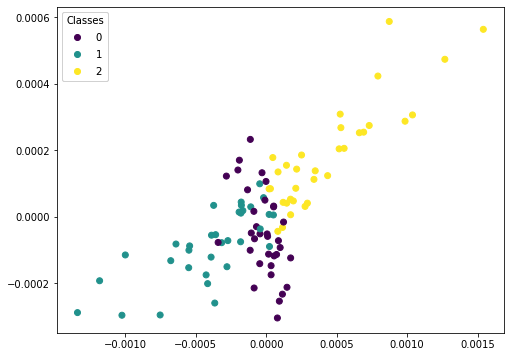

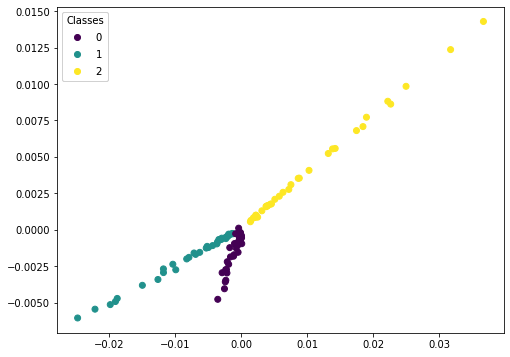

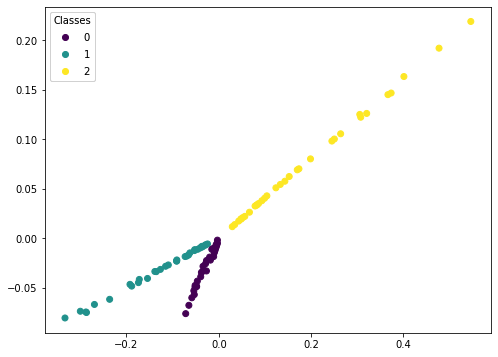

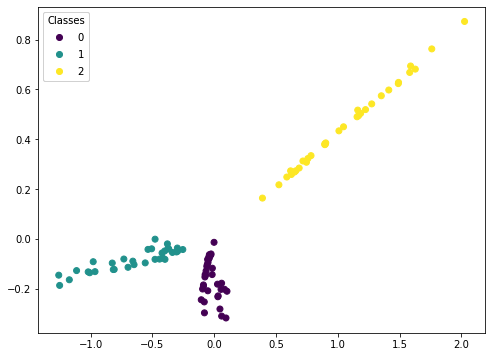

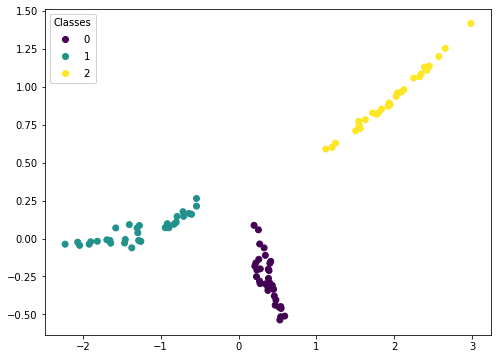

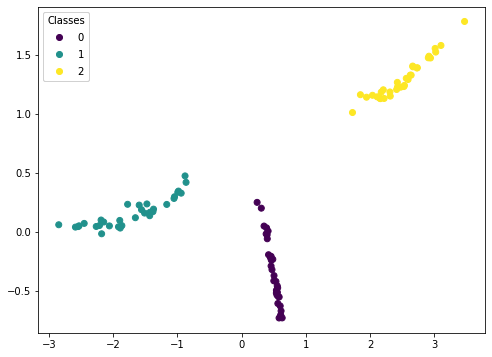

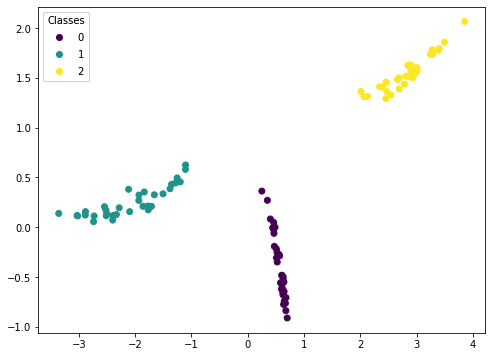

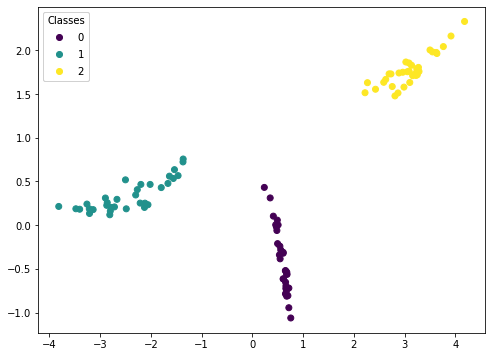

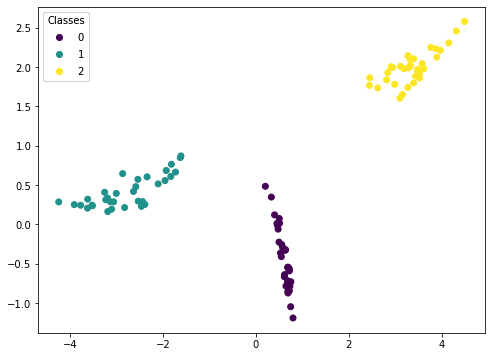

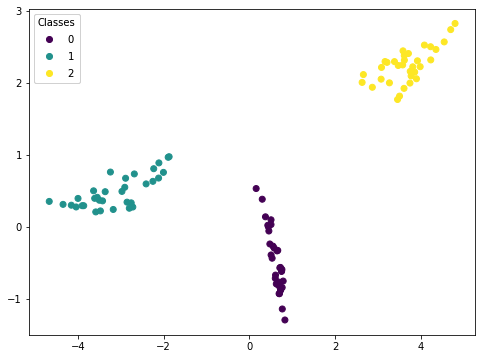

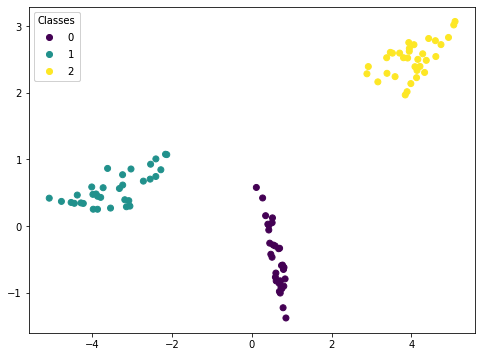

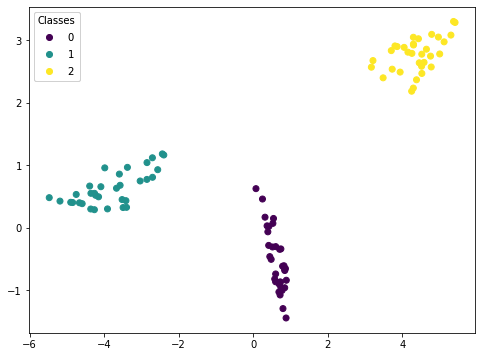

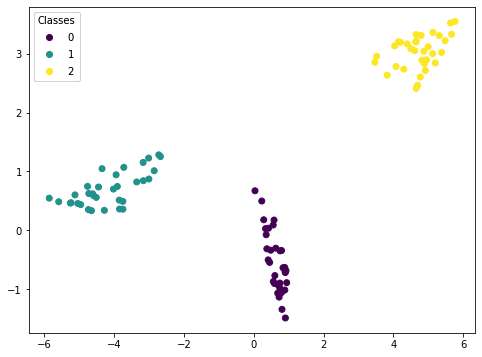

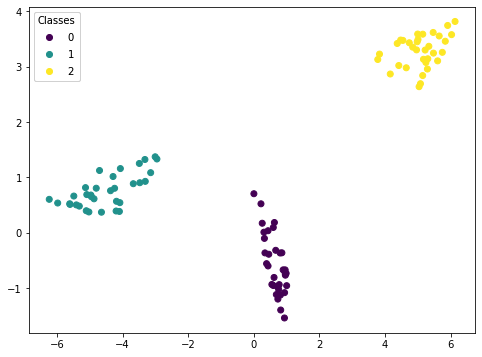

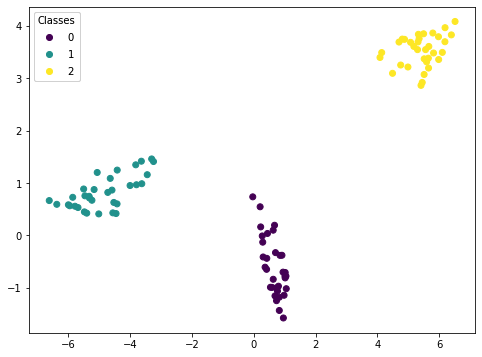

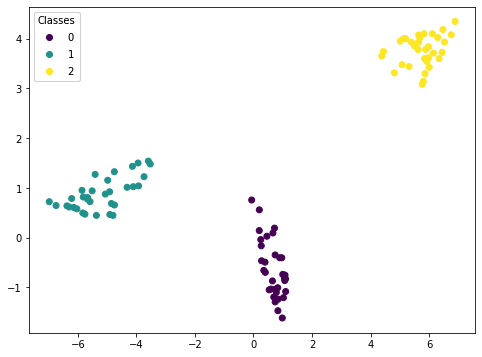

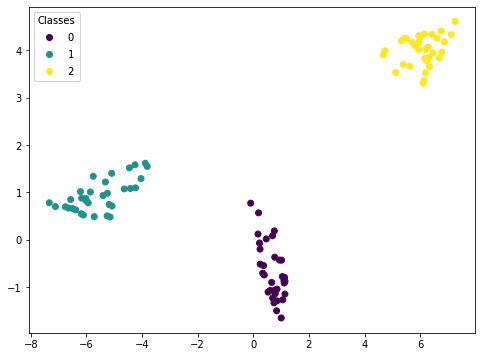

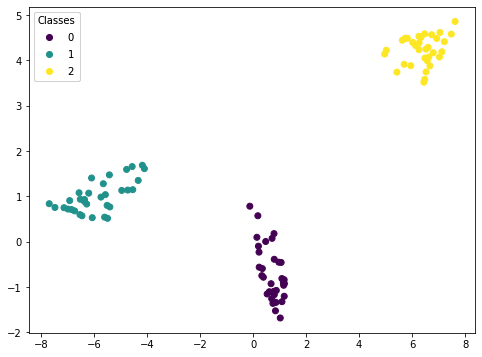

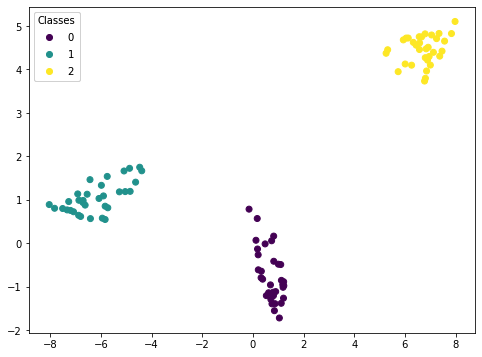

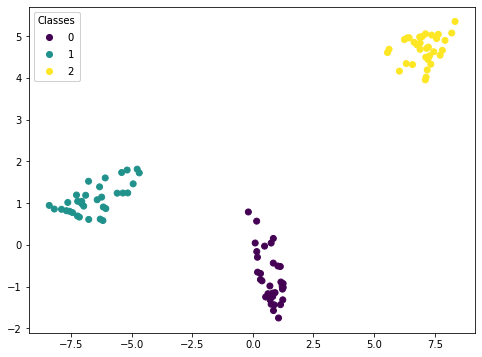

In [29]:
t_sne.fit(X, 10, learning_rate=15, max_iter=20, std_init=1.0, display_func=display_plot)

**Test it on iris.**

In [30]:
X, y = datasets.load_iris(return_X_y=True)

In [31]:
display_plot = display_func(y)

In [32]:
t_sne.reset()

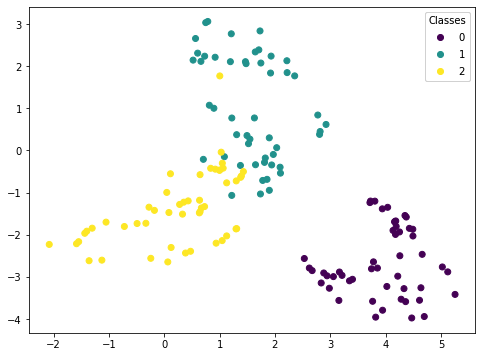

Finished.


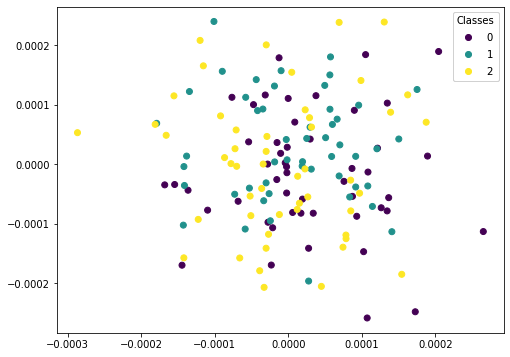

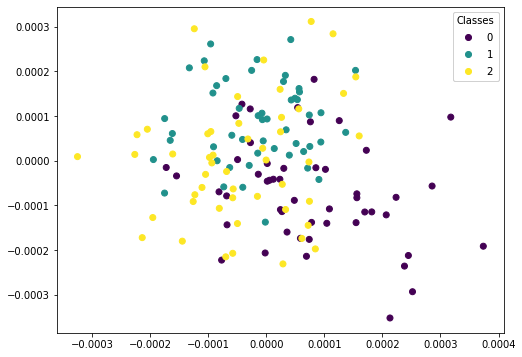

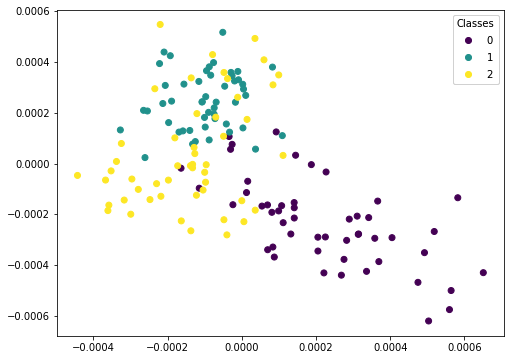

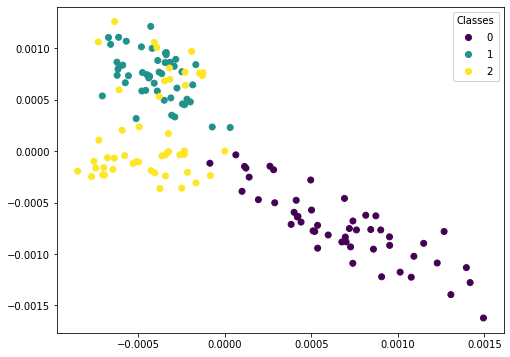

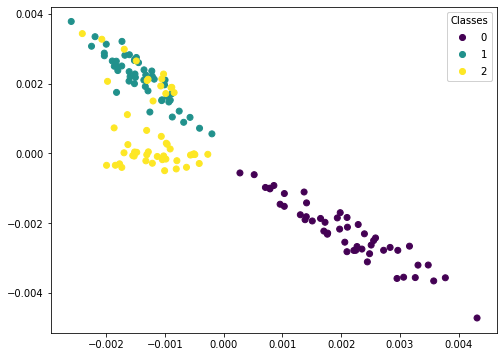

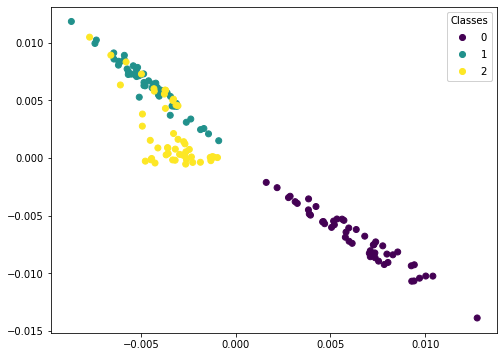

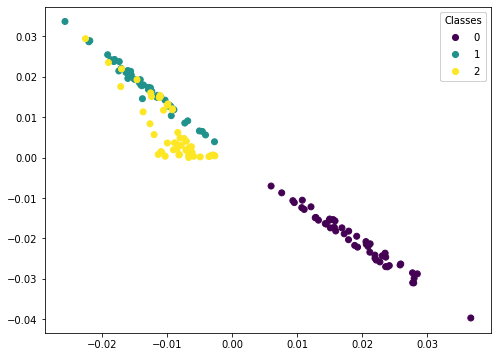

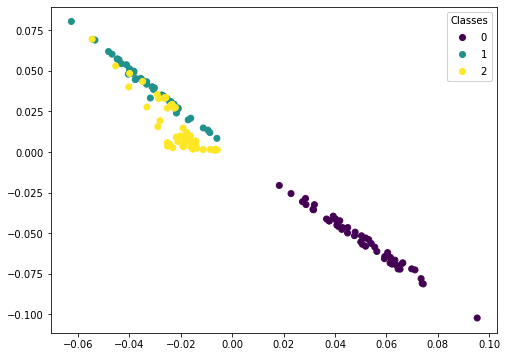

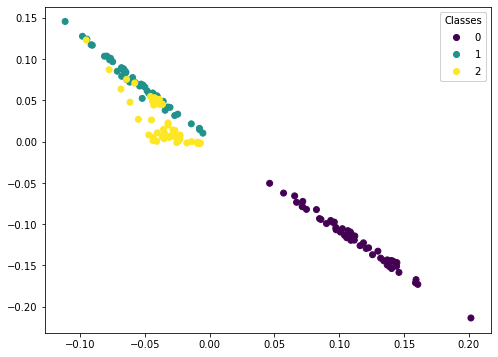

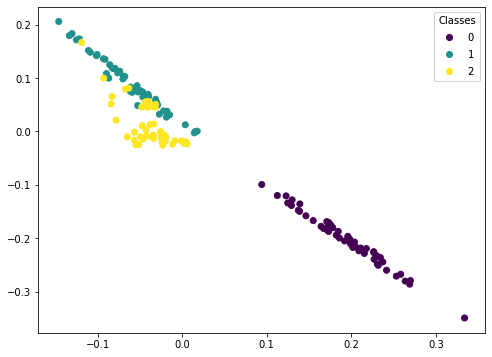

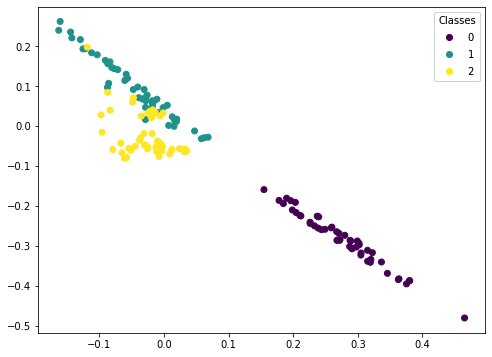

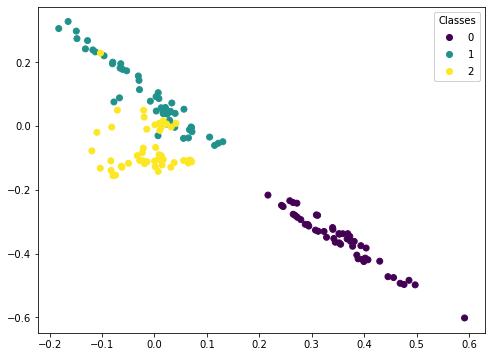

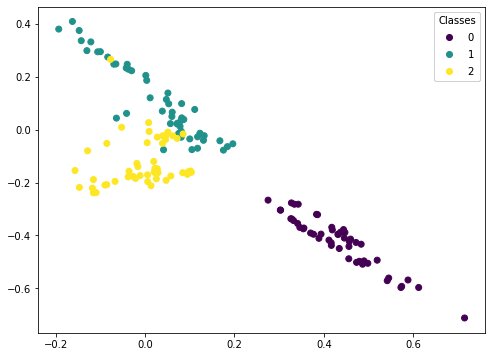

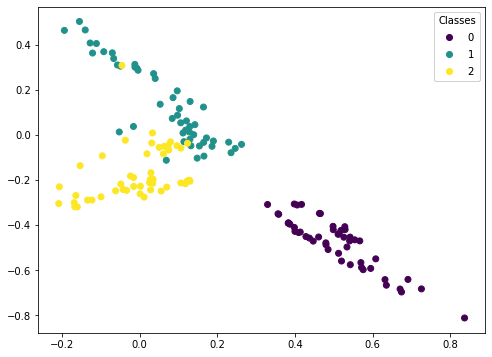

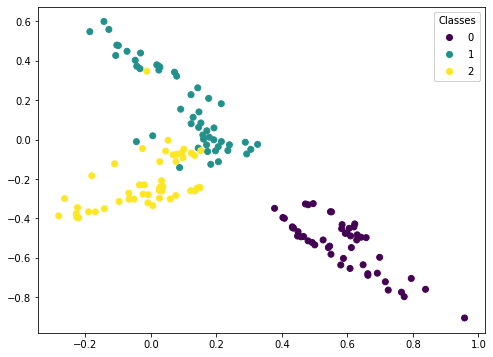

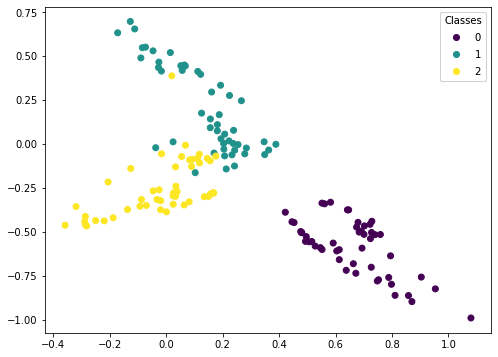

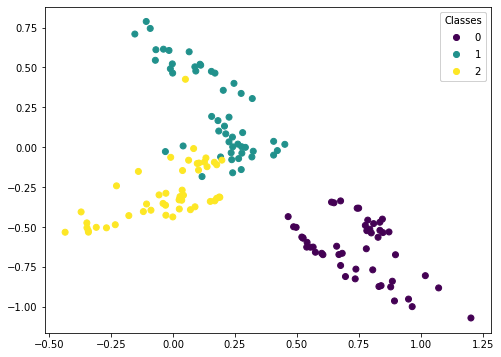

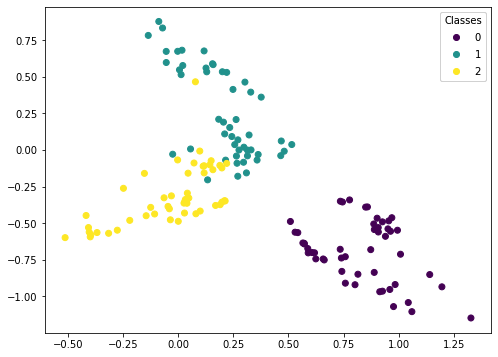

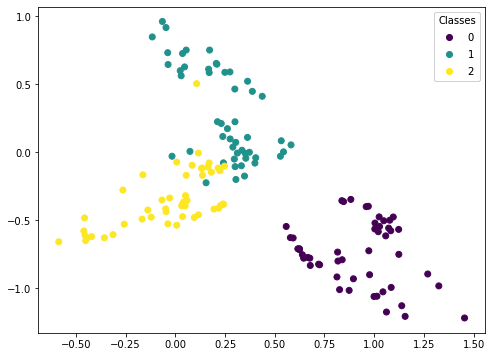

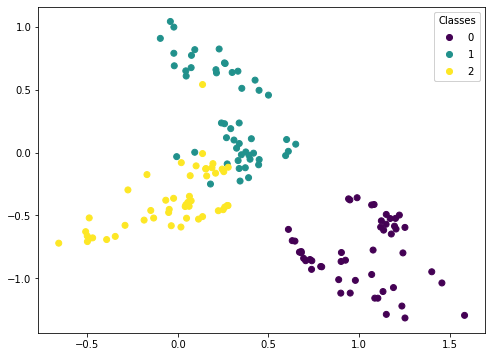

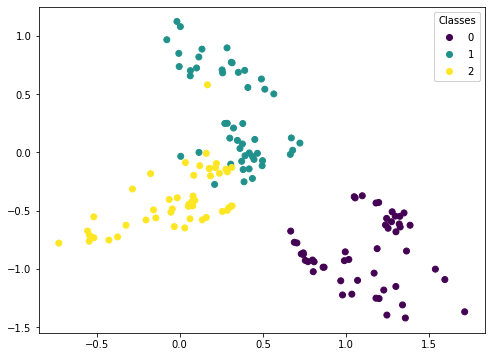

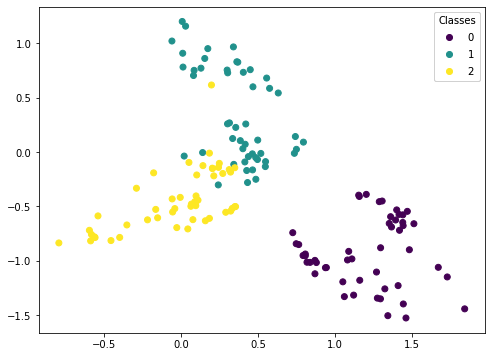

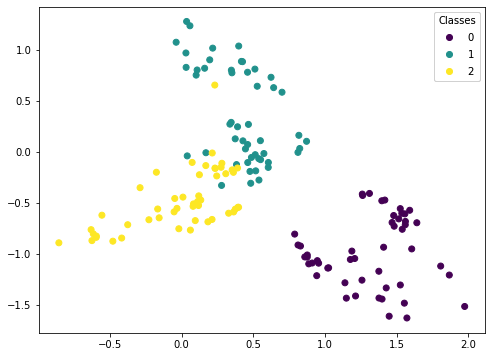

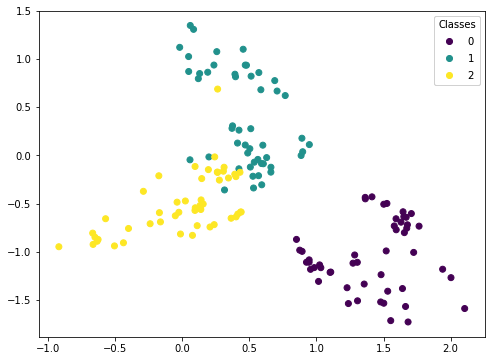

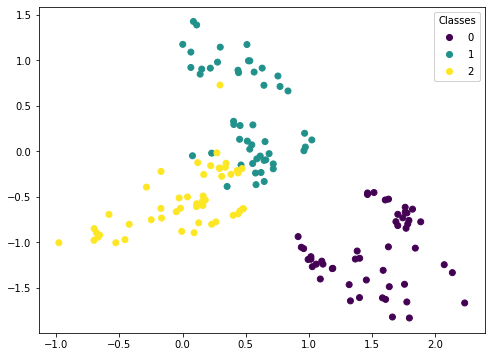

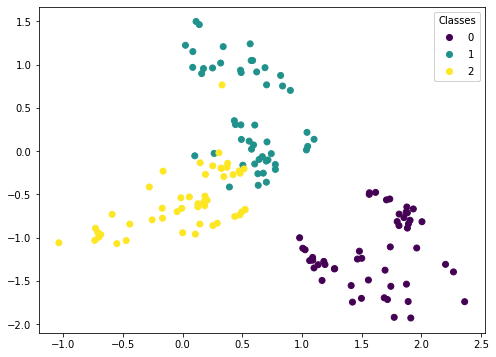

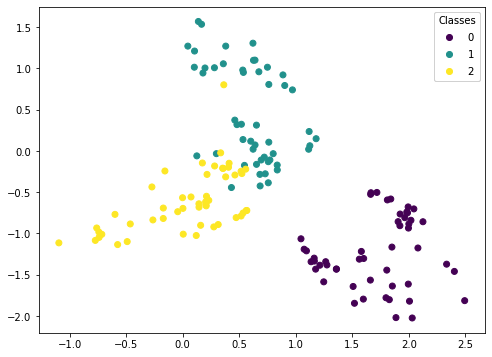

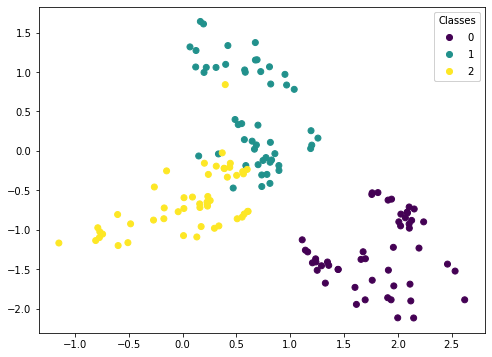

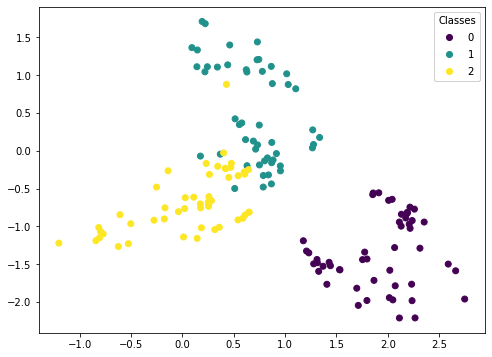

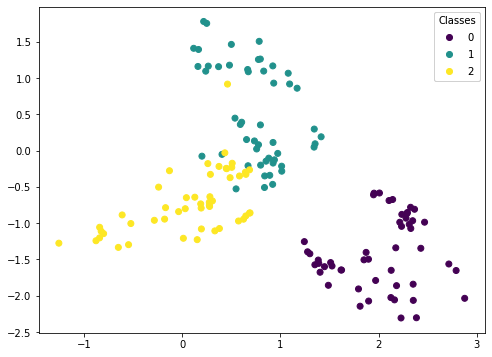

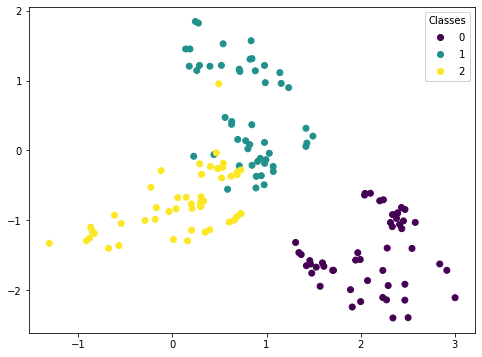

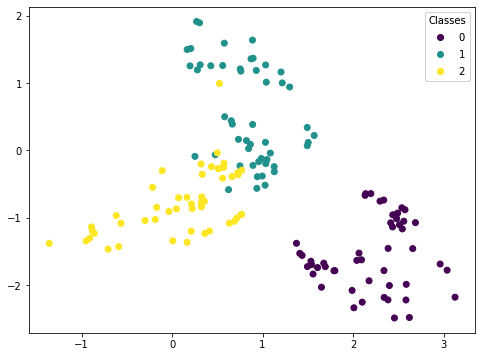

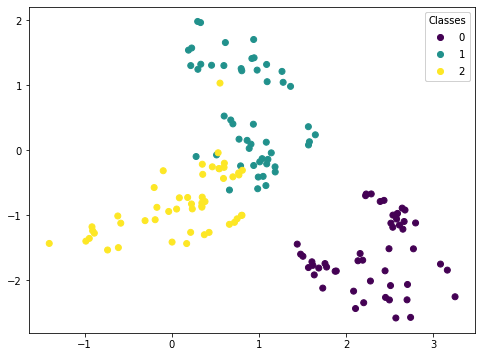

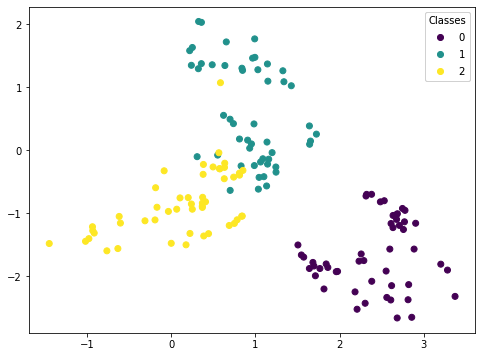

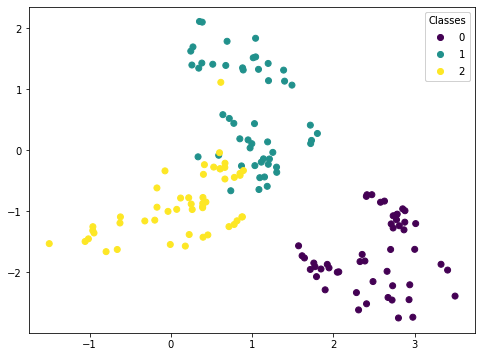

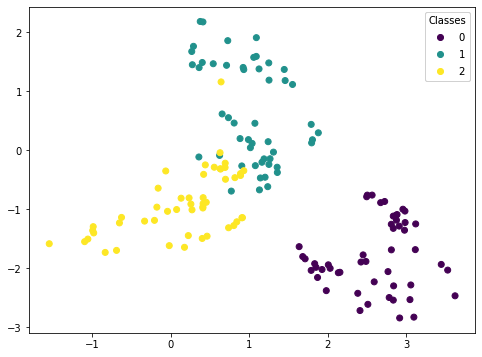

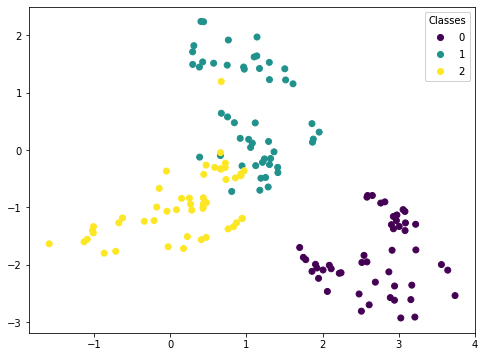

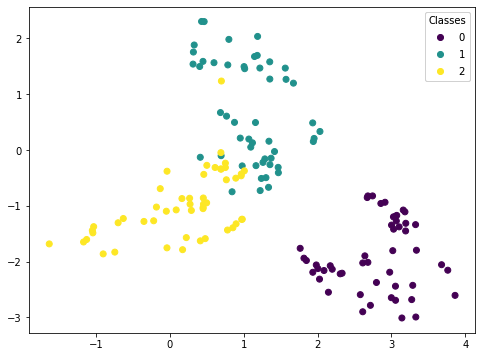

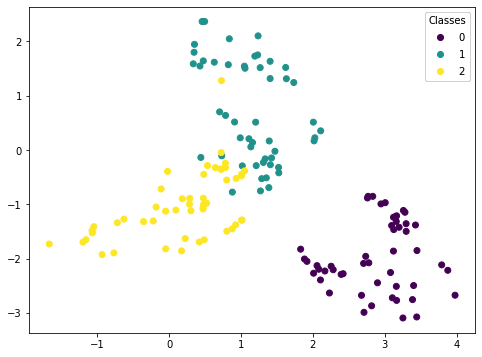

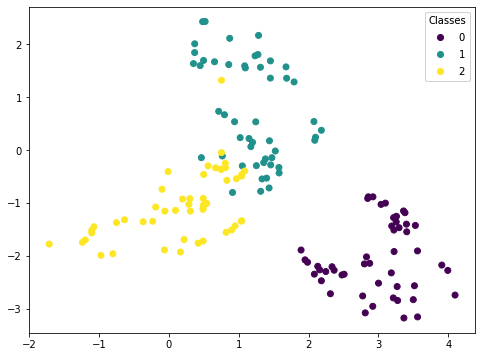

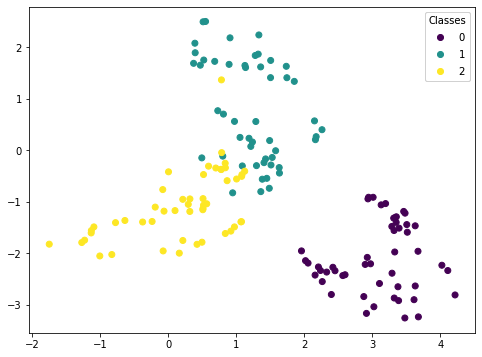

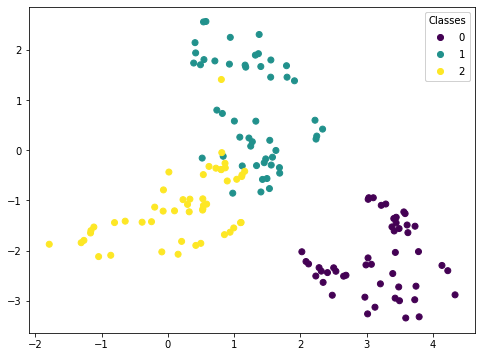

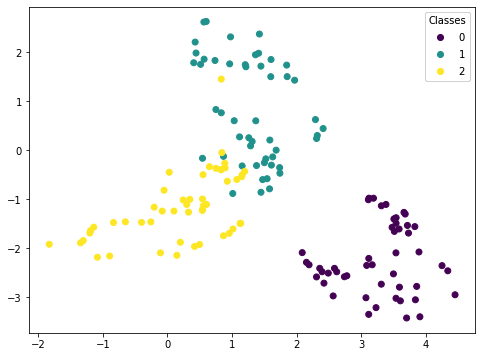

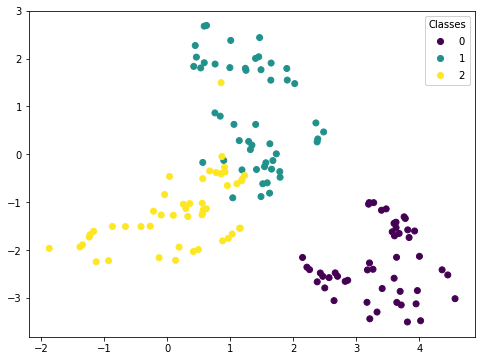

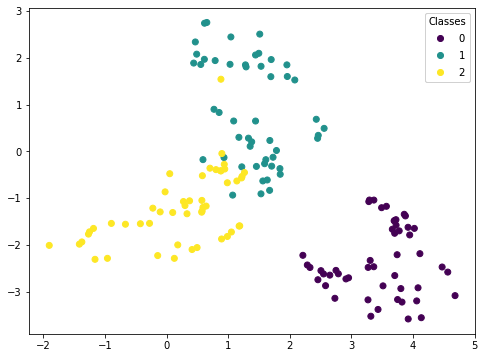

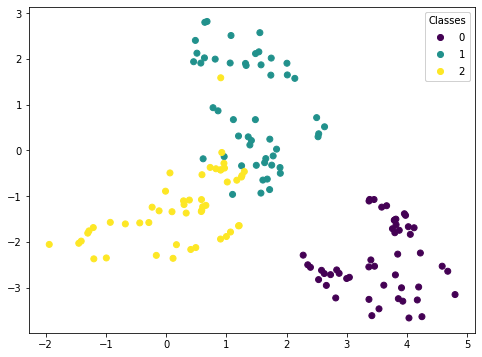

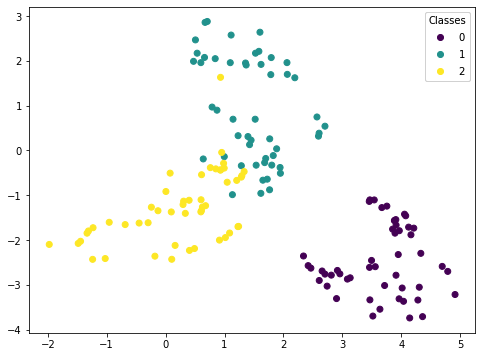

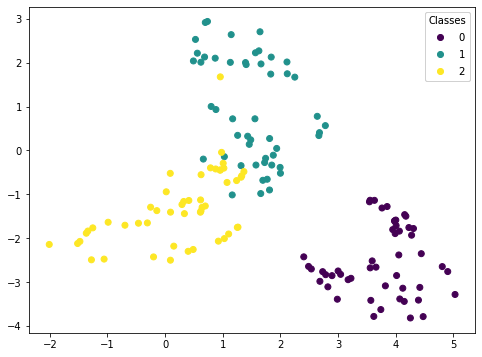

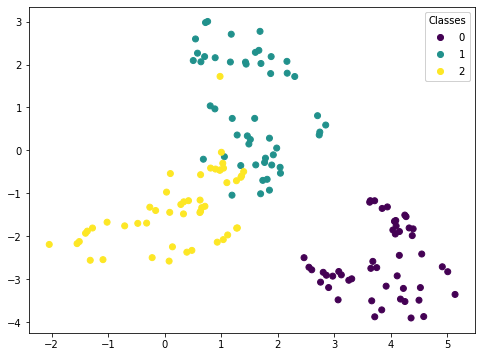

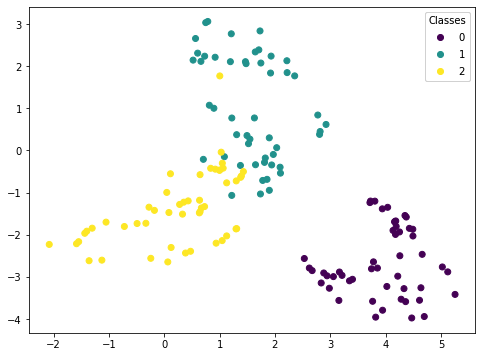

In [34]:
t_sne.fit(X, 10, learning_rate=10, max_iter=50, std_init=1.0, display_func=display_plot)

**Test it on digits.**

In [35]:
X, y = datasets.load_digits(return_X_y=True)

In [36]:
X, _, y, _ = train_test_split(X, y, test_size=0.9, stratify=y)

In [37]:
display_plot = display_func(y, 10, 15)

In [38]:
X.shape

(179, 64)

Since the implemented algorithm is not fast, sampling from dataset will help train faster.

In [39]:
t_sne.reset()

In [ ]:
t_sne.fit(X, 10, learning_rate=10, max_iter=50, std_init=1.0, display_func=display_plot)

Found std for 62.
